In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Finding closest centroids


$$c^{(i)}$$



that minimizes: $$\parallel x^{i}-\mu_{j}\parallel^{2} $$


$$ \mu_j - \textrm{the position of the j'th centroid}$$
$$c^{(i)} - \textrm{the index of the centroid that is closest to } x^i$$





In [23]:
def find_closest_centroids(X, centroids):
  K = centroids.shape[0]
  m = X.shape[0]
  index = np.zeros(m,dtype=int) #holds the index of the closest centroid

  for i in range(m):
    distance = []
    for j in range(K):
      norm = np.linalg.norm(X[i]-centroids[j])
      distance.append(norm)
    index[i] = np.argmin(distance)

  return index

### Compute centroid means
$$ \mu_k=\frac1{\mid C_k \mid} \sum_{i \in C_k}{x^i} $$
$$C_k -\textrm{the set of examples that are assigned to centroid 𝑘}$$
$$\mid C_k \mid -\textrm{is the number of examples in the set }C_k$$

In [4]:
def compute_centroids(X, index, K):
  centroids = np.zeros((K, X.shape[1]))

  for k in range(K):
    points = X[index==k] #index[i] contains the index of the centroid closest to example i
    centroids[k] = np.mean(points, axis=0)

  return centroids

In [28]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    index = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print(f"KMeans iteration {i, max_iters-1}")

        # For each example in X, assign it to the closest centroid
        index = find_closest_centroids(X, centroids)

        #compute new centroids
        centroids = compute_centroids(X, index, K)

    return centroids, index

In [6]:
def kMeans_random_centroid(X,K):
  rand_index = np.random.permutation(X.shape[0])
  centroids = X[rand_index[:K]] #first K random index as centroids
  return centroids

In [7]:
original_img = plt.imread('dog.jpg') #photo from pixabay: https://pixabay.com/photos/dog-cavalier-king-charles-spaniel-1606600/

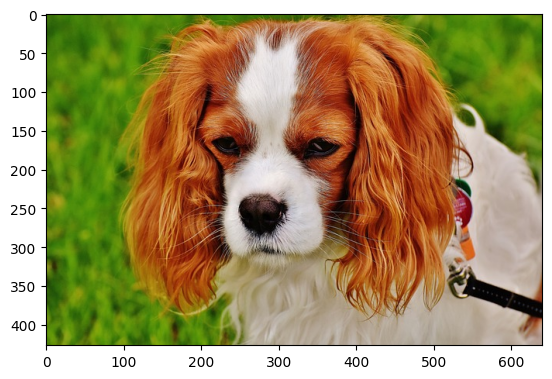

In [8]:
plt.imshow(original_img)

In [9]:
print(f'shape: {original_img.shape}')

shape: (427, 640, 3)


In [10]:
original_img = original_img/255 #all values are in the range 0-1

In [12]:
X_img = np.reshape(original_img, (original_img.shape[0]*original_img.shape[1],3))

In [16]:
print(f'shape: {X_img.shape}')

shape: (273280, 3)


In [14]:
K = 20
max_iters = 10

init_centroids = kMeans_random_centroid(X_img, K)
centroids, index = run_kMeans(X_img, init_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


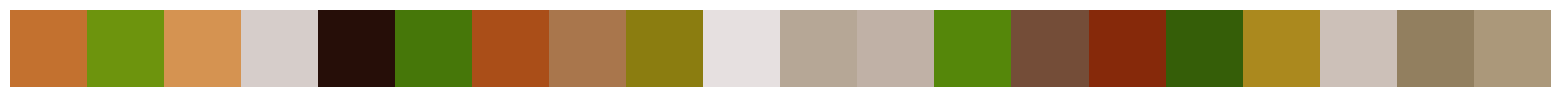

In [21]:
plt.figure(figsize=(20, 1))
color_palette = centroids.reshape((1, -1, 3))
plt.imshow(color_palette)
plt.axis('off')
plt.show()

In [24]:
#Compress the image
index = find_closest_centroids(X_img, centroids)
X_compress = centroids[index,:] #Replace each pixel with the color of the closest centroid
X_compress = np.reshape(X_compress, original_img.shape)

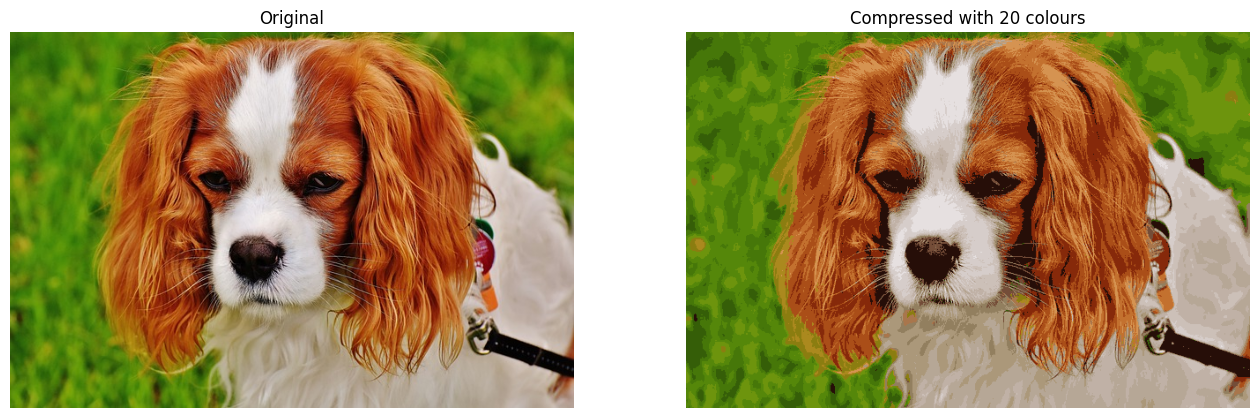

In [27]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_compress)
ax[1].set_title(f'Compressed with {K} colours')
ax[1].set_axis_off()